<a href="https://colab.research.google.com/github/Aggie2024/Time-Series/blob/main/Time_Series_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
import seaborn as sns
sns.set_context("talk", font_scale=0.9)

In [2]:
url="https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jChgNsQbHbg4TGepzIqk8XC9DTIKmyyxb1upo5cfZCgbfIUQc2ZC0YMzuU5uApP140Ob49KBjdqh/pub?gid=1198589591&single=true&output=csv"
df = pd.read_csv(url)
display(df.info(), df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


None

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [3]:
# Convert to datetime
df['datetime'] = pd.to_datetime(df['date'], format='%Y%m%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15341 non-null  int64         
 1   cloud_cover       14938 non-null  float64       
 2   sunshine          14957 non-null  float64       
 3   global_radiation  14939 non-null  float64       
 4   max_temp          14951 non-null  float64       
 5   mean_temp         14922 non-null  float64       
 6   min_temp          14955 non-null  float64       
 7   precipitation     14951 non-null  float64       
 8   pressure          14953 non-null  float64       
 9   snow_depth        13589 non-null  float64       
 10  datetime          15341 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 1.3 MB


In [4]:
# Set the date column as the index.
df = df.set_index('datetime')
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
datetime,,,,,,,,,,
1979-01-01,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [5]:
# Filter out only the required data
df = df.loc['2000':, ['precipitation', 'mean_temp', 'min_temp',
                      'max_temp', 'snow_depth']]
df

,precipitation,mean_temp,min_temp,max_temp,snow_depth
datetime,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0
...,...,...,...,...,...
2020-12-27,2.0,7.5,7.6,7.5,NaN
2020-12-28,0.2,1.1,-1.3,3.6,NaN
2020-12-29,0.0,2.6,1.1,4.1,NaN


In [6]:
# Check for null values
df.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

In [7]:
# Impute null values with interpolation strategy
df = df.interpolate()
df.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

### Q1: What month had the most precipitation between 2000 through 2010?

In [8]:
ts = df['precipitation'].copy()
prec_resampled = ts.resample("MS").sum()
prec_resampled

datetime
2000-01-01     14.5
2000-02-01     64.8
2000-03-01     13.9
2000-04-01     82.5
2000-05-01     78.0
              ...  
2020-08-01     48.2
2020-09-01     19.2
2020-10-01    150.4
2020-11-01     50.6
2020-12-01     64.6
Freq: MS, Name: precipitation, Length: 252, dtype: float64

In [9]:
date_max_precip = ts.idxmax()
max_precip = ts.max()

print(f"The highest daily preciptation was {max_precip}, which occured on {date_max_precip.strftime('%B %d, %Y')} which was a {date_max_precip.day_name()}.")

The highest daily preciptation was 51.6, which occured on August 26, 2015 which was a Wednesday.


In [10]:
plot_df = prec_resampled.loc['2000-01-01':'2010-12-01']
plot_df

datetime
2000-01-01    14.5
2000-02-01    64.8
2000-03-01    13.9
2000-04-01    82.5
2000-05-01    78.0
              ... 
2010-08-01    92.4
2010-09-01    44.6
2010-10-01    63.1
2010-11-01    32.0
2010-12-01    21.3
Freq: MS, Name: precipitation, Length: 132, dtype: float64

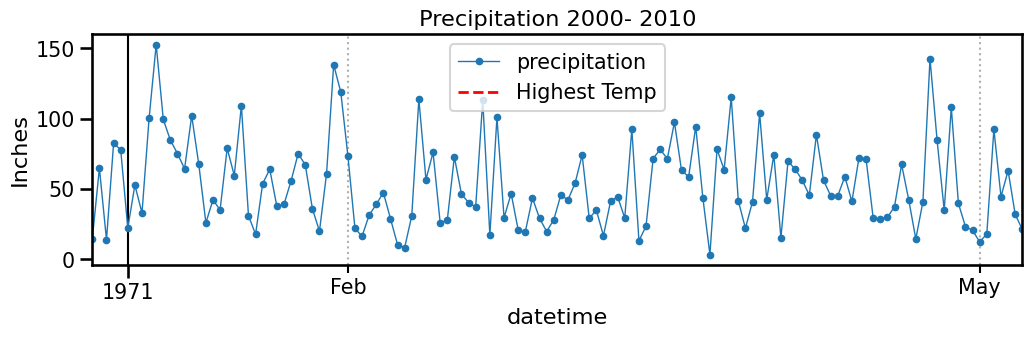

In [27]:
## Make the fig and axis first
# plot the time series with pandas
fig, ax = plt.subplots(figsize=(12,3))
plot_df.plot(ax=ax, title='Precipitation 2000- 2010', ylabel='Inches',
             marker='.',lw=1)
# customize major ticks
major_loc =  mdates.YearLocator(1)
major_fmt = mdates.DateFormatter("%Y")

ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_major_formatter(major_fmt)

# customize minor ticks
minor_loc =  mdates.MonthLocator(interval=3)
minor_fmt = mdates.DateFormatter("%b")

ax.xaxis.set_minor_locator(minor_loc)
ax.xaxis.set_minor_formatter(minor_fmt)

## Making major/minor gridlines visually distinct
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='k')

# ploting the max temp
plt.axvline(max_precip, color='red', linestyle='dashed', linewidth=2, label='Highest Temp')
plt.legend()
plt.show()

## Final xdate tweaks
fig = ax.get_figure()
fig.autofmt_xdate(which='major',rotation=90, ha='center')


Q1 Visualization Requirements
Use a combination of pandas, matplotlib tick formatters, tick locators, and the fig.autofmt_xdate method to:
- Create a wide figure (e.g. figsize=(12,3))
- With the title "Precipitation for 2000-2010"
- With a ylabel of "Inches"
Customize the major xaxis ticks to:
- Have major xaxis ticks every 1 year.
- Use 4-digit years for the labels
- Rotate the major ticks' labels 90 degrees.
- Customize the minor xaxis ticks to:
- Have minor xaxis ticks every 3 months
- Do not label the minor ticks.

Determine the date and value for the most precipitation (the max precipitation).
- Add a vertical line at this date with a label that says the date (using date format: "April 2000") and the max precipitation value.
Make sure to add a legend so that your label is visible.

In [ ]:
ts = df['precipitation'].copy()
prec_resampled = ts.resample("MS").sum()
prec_resampled

In [28]:
ts = df['mean_temp'].copy()
temp_resampled = ts.resample("AS").mean()
temp_resampled

datetime
2000-01-01    11.575683
2001-01-01    11.331507
2002-01-01    12.084247
2003-01-01    12.114521
2004-01-01    11.900683
2005-01-01    11.822877
2006-01-01    12.290822
2007-01-01    11.944384
2008-01-01    11.326776
2009-01-01    11.721644
2010-01-01    10.657397
2011-01-01    12.366438
2012-01-01    11.300956
2013-01-01    11.166301
2014-01-01    12.658904
2015-01-01    12.123699
2016-01-01    11.906284
2017-01-01    12.242466
2018-01-01    12.501370
2019-01-01    12.206164
2020-01-01    12.723634
Freq: AS-JAN, Name: mean_temp, dtype: float64

In [30]:
date_min_temp = df['min_temp'].idxmin()
min_temp = df['min_temp'].min()

print(f"The lowest temperature of {min_temp} degrees occured in {date_min_temp.strftime('%Y')}.")

The lowest temperature of -9.4 degrees occured in 2010.


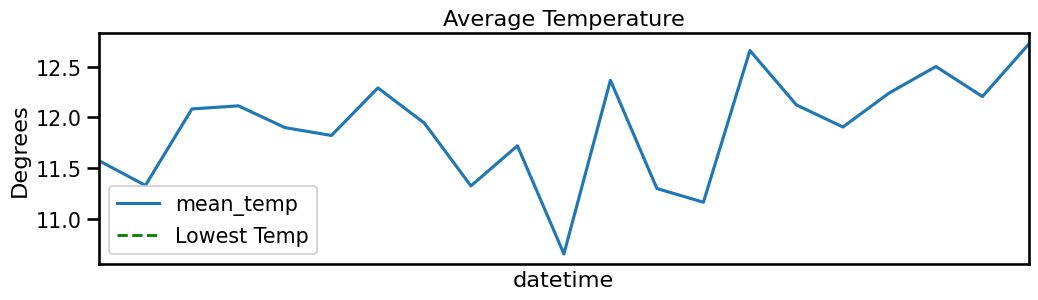

In [32]:
ax = temp_resampled.plot(figsize=(12,3))
ax.set( title='Average Temperature',
      ylabel='Degrees')

# customize major ticks
major_loc =  mdates.YearLocator(5)
major_fmt = mdates.DateFormatter("%Y")

ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_major_formatter(major_fmt)

# customize minor ticks
minor_loc =  mdates.YearLocator(1)
ax.xaxis.set_minor_locator(minor_loc)

# ploting the max temp
plt.axvline(min_temp, color='green', linestyle='dashed', linewidth=2, label='Lowest Temp')
plt.legend()
plt.show()

## Final xdate tweaks
fig = ax.get_figure()
fig.autofmt_xdate()